In [42]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [17]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [18]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


 Preprocessing

In [19]:
df = pd.read_csv("StudentsPerformance.csv", encoding='utf-8-sig')
print(df.columns.tolist())


['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


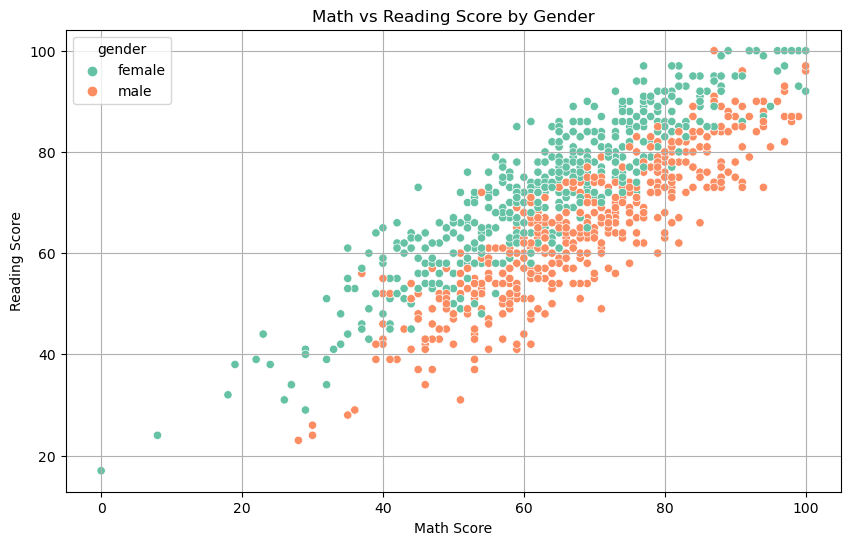

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', palette='Set2')
plt.title('Math vs Reading Score by Gender')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True)
plt.show()

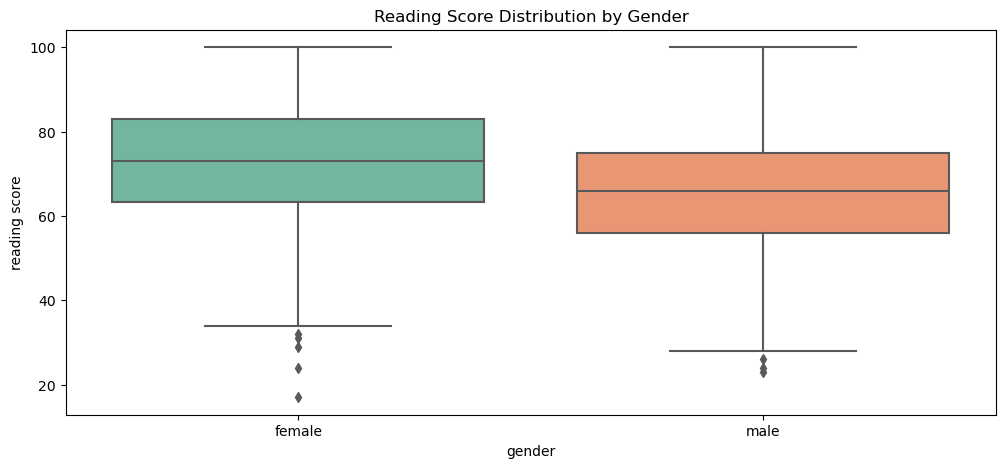

In [35]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='gender', y='reading score', data=df, palette="Set2")
plt.title('Reading Score Distribution by Gender')
plt.show()

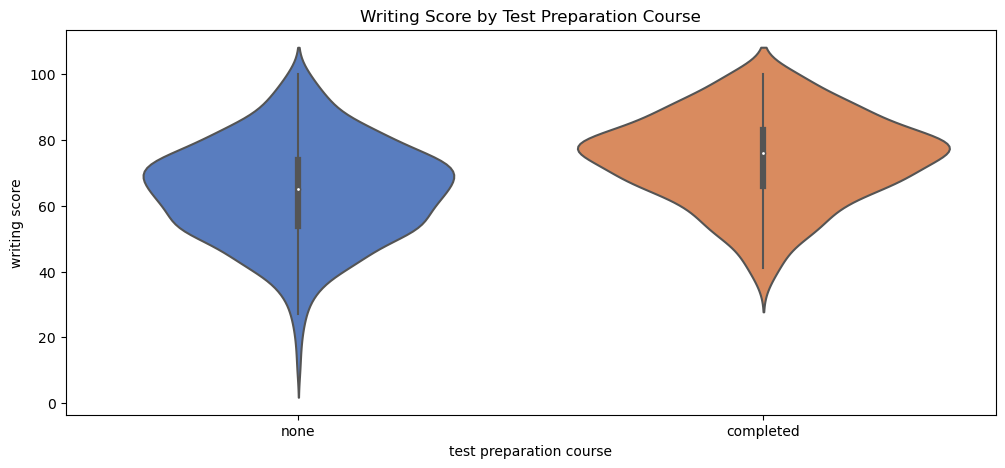

In [36]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='test preparation course', y='writing score', data=df, palette="muted")
plt.title('Writing Score by Test Preparation Course')
plt.show()

In [20]:
# Create a target variable: Pass (1) if average score >= 60, else Fail (0)
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = np.where(df['average_score'] >= 60, 1, 0)

# Drop the individual scores and average_score
df = df.drop(['math score', 'reading score', 'writing score', 'average_score'], axis=1)

# Encode categorical variables
le = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('pass', axis=1)
y = df['pass']

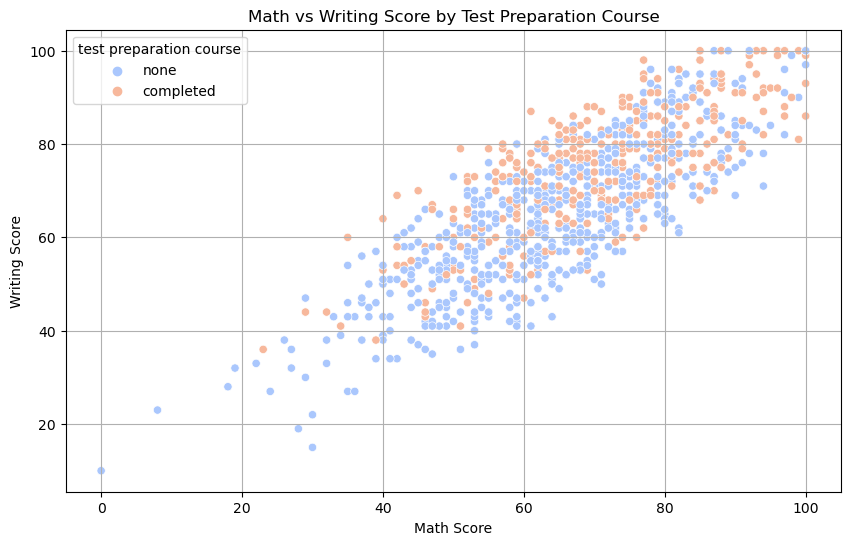

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math score', y='writing score', hue='test preparation course', palette='coolwarm')
plt.title('Math vs Writing Score by Test Preparation Course')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.grid(True)
plt.show()

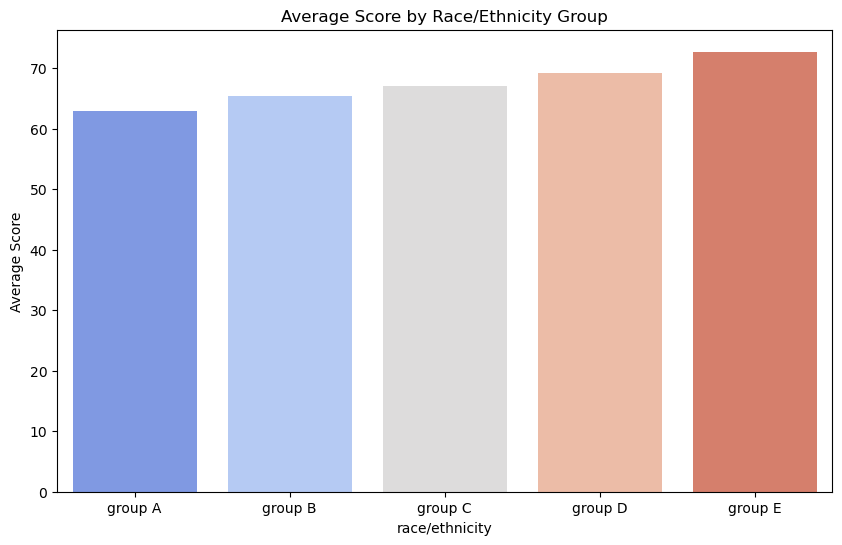

In [38]:
df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
grouped = df.groupby('race/ethnicity')['average'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='race/ethnicity', y='average', palette='coolwarm')
plt.title('Average Score by Race/Ethnicity Group')
plt.ylabel('Average Score')
plt.show()

In [45]:



# ---------------------
# Step 2: Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)






In [46]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("🔵 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("\n")

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("🟢 Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

🔵 Logistic Regression Results
Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.44      0.23      0.30        62
           1       0.71      0.87      0.78       138

    accuracy                           0.67       200
   macro avg       0.58      0.55      0.54       200
weighted avg       0.63      0.67      0.63       200



🟢 Random Forest Classifier Results
Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.47      0.24      0.32        62
           1       0.72      0.88      0.79       138

    accuracy                           0.68       200
   macro avg       0.59      0.56      0.55       200
weighted avg       0.64      0.68      0.64       200



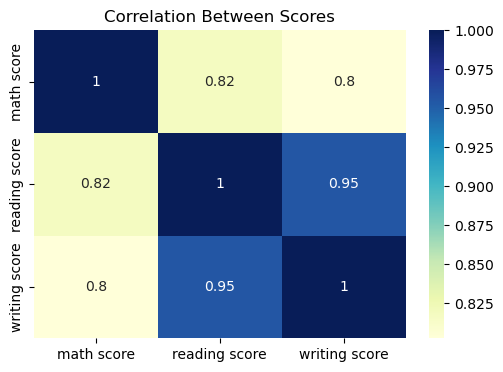

In [47]:
scores_only = df[['math score', 'reading score', 'writing score']]
corr_matrix = scores_only.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Between Scores')
plt.show()


Evaluation Matrix

In [52]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 14  48]
 [ 18 120]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.23      0.30        62
           1       0.71      0.87      0.78       138

    accuracy                           0.67       200
   macro avg       0.58      0.55      0.54       200
weighted avg       0.63      0.67      0.63       200

Accuracy Score: 0.67
